# statistics

## repeated measures ANOVA

In [2]:
from gradecc.measures import get_measures

df = get_measures()

data/measures.csv
Making gradients for subjects...


100%|██████████| 45/45 [01:16<00:00,  1.70s/it]


Making eccentricity...


100%|██████████| 134730/134730 [00:00<00:00, 762924.01it/s]


Data saved to data/measures.csv
Reading data from data/measures.csv


In [3]:
from gradecc.stats import rm_anova

df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']

Computing repeated measures ANOVA...


100%|██████████| 4990/4990 [00:50<00:00, 97.93it/s] 


In [4]:
# df_stats_ecc

In [5]:
from gradecc.plot_brain import plot_brain

# plot_brain(df_stats_ecc, 'F', color_range=(1, 10),)

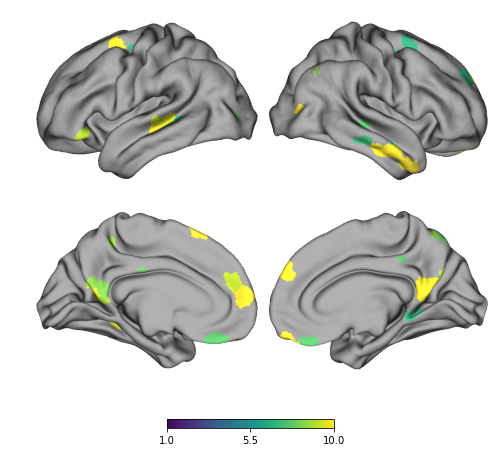

In [6]:
plot_brain(df_stats_ecc, 'F', 'pvalue_corrected',
           color_range=(1, 10), layout='grid')

In [7]:
# think of multilevel anova. each region has four values.

In [8]:
# loosen the FDR criteria

In [9]:
df_stats_ecc.fdr_significant.sum()

51

In [10]:
df_stats_ecc[df_stats_ecc.fdr_significant == True].region.tolist()

['7Networks_LH_Cont_Cing_8',
 '7Networks_LH_Default_PFC_19',
 '7Networks_LH_Default_PFC_27',
 '7Networks_LH_Default_PFC_46',
 '7Networks_LH_Default_PFC_8',
 '7Networks_LH_Default_Temp_13',
 '7Networks_LH_Default_Temp_17',
 '7Networks_LH_Default_Temp_18',
 '7Networks_LH_Default_Temp_19',
 '7Networks_LH_Default_Temp_21',
 '7Networks_LH_Default_pCunPCC_1',
 '7Networks_LH_Default_pCunPCC_10',
 '7Networks_LH_Default_pCunPCC_2',
 '7Networks_LH_Default_pCunPCC_3',
 '7Networks_LH_Default_pCunPCC_4',
 '7Networks_LH_Default_pCunPCC_5',
 '7Networks_LH_Default_pCunPCC_7',
 '7Networks_LH_DorsAttn_FEF_5',
 '7Networks_LH_DorsAttn_FEF_6',
 '7Networks_LH_Limbic_OFC_4',
 '7Networks_LH_Limbic_OFC_9',
 '7Networks_LH_SalVentAttn_Med_13',
 '7Networks_LH_Vis_34',
 '7Networks_LH_Vis_5',
 '7Networks_RH_Cont_PFCl_28',
 '7Networks_RH_Cont_PFCl_34',
 '7Networks_RH_Cont_pCun_2',
 '7Networks_RH_Default_PFCdPFCm_13',
 '7Networks_RH_Default_PFCdPFCm_14',
 '7Networks_RH_Default_Par_14',
 '7Networks_RH_Default_Temp_1',

## pairwise t-tests

In [ ]:
from gradecc.stats import pairwise_ttests

df_stats_pairwise = pairwise_ttests(df)

KeyboardInterrupt: 

In [15]:
df_stats_pairwise

region     tstat  \
measure      A        B                                           
eccentricity baseline early  7Networks_LH_Cont_Cing_1 -1.114352   
                      early  7Networks_LH_Cont_Cing_2  0.431321   
                      early  7Networks_LH_Cont_Cing_3  0.136411   
                      early  7Networks_LH_Cont_Cing_4 -0.002800   
                      early  7Networks_LH_Cont_Cing_5 -1.339883   
...                                               ...       ...   
gradient4    early    late        7Networks_RH_Vis_79  0.525043   
                      late         7Networks_RH_Vis_8  0.489644   
                      late        7Networks_RH_Vis_80  0.705840   
                      late        7Networks_RH_Vis_81  0.885883   
                      late         7Networks_RH_Vis_9  0.447303   

                             pvalue_corrected  
measure      A        B                        
eccentricity baseline early          0.402244  
                      early          0.695323  
                      early          0.971872  
                      early          0.997772  
                      early          0.406150  
...                                       ...  
gradient4    early    late           0.600873  
                      late           0.758587  
                      late           0.482152  
                      late           0.567142  
                      late           0.885946  

[14970 rows x 3 columns]

In [16]:
df_ecc_pairs = df_stats_pairwise.xs('eccentricity', level=0)

In [17]:
for pair in df_ecc_pairs.index.unique():
    text = 'Eccentricity t-tests ' + pair[0] + ' to ' + pair[1]
    plot_brain(df_ecc_pairs.loc[pair], 'tstat',
           text=text, color_range=(-4, 4), color_map='bwr', layout='grid', save_figure=True)

TypeError: 'NoneType' object is not callable

TypeError: 'NoneType' object is not callable

In [ ]:
# masked for FDR corrected pvalue
plot_brain(df_ecc_pairs.loc[pair], 'tstat', 'pvalue_corrected',
                  text='region-wise t-tests FDR-corrected significant',
                  color_range=(-4, 4), color_map='bwr')

In [ ]:
# these areas show expansion vs contraction